In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen
from geopy.geocoders import Nominatim
import folium
from math import *

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib
import wget

In [3]:
montreal_location_file = pd.read_html("https://fr.wikipedia.org/wiki/Montr%C3%A9al")

In [4]:
len(montreal_location_file)

27

In [5]:
montreal_superficie_borough = montreal_location_file[8]

In [6]:
montreal_superficie_borough.drop(["Population (2016) [147]"], 1, inplace=True)

In [7]:
montreal_superficie_borough.drop(index=19, axis=0, inplace=True)

In [8]:
montreal_superficie_borough.rename(columns={"No" : "Borough_number", "Nom" : "Borough_name", "Superficie (km2)" : "Area (m²)", "Densité habitants / km2" : "Population_density (people/km²)"}, inplace=True)

## From Montreal with snow

In [9]:
montreal_file = pd.read_excel("quartiers_références_montreal.xlsx")

In [10]:
montreal_file.rename(columns={"No_QR" : "Neighborhood_number", "Nom_QR" : "Neighborhood_name", "No_arr" : "Borough_number", "Nom_arr_Montreal" : "Borough_name", "Nom_mun" : "City"}, inplace=True)

In [11]:
liste_columns = ["Borough_number", "Borough_name", "Neighborhood_number", "Neighborhood_name", "City"]

In [12]:
montreal_df = montreal_file.reindex(columns=liste_columns)

In [13]:
latitude_borough_montreal = []
longitude_borough_montreal = []

In [14]:
for name, city in zip(montreal_df["Borough_name"], montreal_df["City"]):
    address = name, city

    geolocator = Nominatim(user_agent="paris_agent")
    location = geolocator.geocode(address)
    Latitude = location.latitude
    Longitude = location.longitude
    latitude_borough_montreal.append(Latitude)
    longitude_borough_montreal.append(Longitude)
    print(location)
    print(Latitude)
    print(Longitude)

Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5418922
-73.6803193
Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5418922
-73.6803193
Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5418922
-73.6803193
Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5418922
-73.6803193
Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5418922
-73.6803193
Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5418922
-73.6803193
Villeray–Saint-Michel–Parc-Extension, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5370059
-73.6257956
Villeray–Saint-Michel–Parc-Extension, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5370059
-73.6257956
Villeray–Saint-Michel–Parc-Extension, Montréal, Agglomération de M

Lachine, Autoroute du Souvenir, Lachine-Ouest, Arrondissement de Lachine, Montréal, Agglomération de Montréal, Montréal (06), Québec, H8T 1H8, Canada
45.4486762
-73.7112039
Lachine, Autoroute du Souvenir, Lachine-Ouest, Arrondissement de Lachine, Montréal, Agglomération de Montréal, Montréal (06), Québec, H8T 1H8, Canada
45.4486762
-73.7112039
Pierrefonds-Roxboro, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.4955083
-73.8471749
Pierrefonds-Roxboro, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.4955083
-73.8471749
Anjou, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.6048982
-73.5466723
Outremont, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5186167
-73.6068856
L'Île-Bizard–Sainte-Geneviève, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.4950421
-73.90344498268641


In [15]:
montreal_df["Borough_latitude"] = latitude_borough_montreal

In [16]:
montreal_df["Borough_longitude"] = longitude_borough_montreal

In [17]:
latitude_neighborhood_montreal = []
longitude_neighborhood_montreal = []

In [18]:
for name, borough in zip(montreal_df["Neighborhood_name"], montreal_df["Borough_name"]):
    
    try:
        address = name, borough
        geolocator = Nominatim(user_agent="paris_agent")
        location = geolocator.geocode(address)
        Latitude = location.latitude
        Longitude = location.longitude 
        latitude_neighborhood_montreal.append(Latitude)
        longitude_neighborhood_montreal.append(Longitude)
        
    except:
        AttributeError
        address = borough
        geolocator = Nominatim(user_agent="paris_agent")
        location = geolocator.geocode(address)
        Latitude = location.latitude
        Longitude = location.longitude
        latitude_neighborhood_montreal.append(Latitude)
        longitude_neighborhood_montreal.append(Longitude)
        
    print(location)
    print(Latitude)
    print(Longitude, "\n")

Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, H4J 1H5, Canada
45.5324768
-73.7069312 

Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5418922
-73.6803193 

Parc Nicolas-Viel, Chameran, Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.551034
-73.67711557734768 

Cimetière du Sault-au-Récollet, Sault-au-Récollet, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.56742815
-73.65909772296408 

Ahuntsic-Cartierville, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5418922
-73.6803193 

Rue de L'Île-De-La-Visitation, Sault-aux-Récollets, La Visitation, Montréal, Agglomération de Montréal, Montréal (06), Québec, H2B 1W9, Canada
45.5753404
-73.6626508 

Villeray–Saint-Michel–Parc-Extension, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5370059
-73.6257956 

René-Goupil, Montréal, Agglomération de Montréal, Montré

Montreal-Nord-Ouest, Montréal-Nord, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.587017
-73.64300107210434 

Centre-Nord, Montréal-Nord, Montréal, Agglomération de Montréal, Montréal (06), Québec, H1G 5W2, Canada
45.60779195
-73.6308723909703 

Montréal-Nord, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.5938992
-73.6376062 

Montréal-Nord-Est, Montréal-Nord, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.61530985
-73.61719381815277 

Port-Maurice, Saint-Léonard, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.58404655
-73.60797693924935 

Grande-Prairie, Saint-Léonard, Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.59634795
-73.58884426799304 

Verdun, Rue Willibrord, Verdun-Centre, Verdun, Montréal, Agglomération de Montréal, Montréal (06), Québec, H4G 1W5, Canada
45.4592869
-73.5720103 

Île-des-Sœurs, Verdun, Montréal, Agglomération de Montréal, Montréal (06), Québec

In [19]:
montreal_df["Neighborhood_latitude"] = latitude_neighborhood_montreal
montreal_df["Neighborhood_longitude"] = longitude_neighborhood_montreal

In [20]:
montreal_dataframe = pd.merge(montreal_df, montreal_superficie_borough, on="Borough_name", how="left")

In [21]:
montreal_dataframe.loc[76, "Borough_number_y"] = 8
montreal_dataframe.loc[76, "Area (m²)"] = 236
montreal_dataframe.loc[76, "Population_density (people/km²)"] = 7802

In [22]:
montreal_dataframe["Area (m²)"] = montreal_dataframe["Area (m²)"]*10**5

In [23]:
montreal_dataframe.drop(["Borough_number_x", "City"], 1, inplace=True)

In [24]:
montreal_dataframe.rename(columns={"Borough_number_y" : "Borough_number"}, inplace=True)


In [25]:
montreal_dataframe


,Borough_name,Neighborhood_number,Neighborhood_name,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude,Borough_number,Area (m²),Population_density (people/km²)
0,Ahuntsic-Cartierville,1,Cartierville,45.541892,-73.680319,45.532477,-73.706931,1,24200000.0,"5 547,3"
1,Ahuntsic-Cartierville,2,Nouveau-Bordeaux,45.541892,-73.680319,45.541892,-73.680319,1,24200000.0,"5 547,3"
2,Ahuntsic-Cartierville,3,Nicolas-Viel,45.541892,-73.680319,45.551034,-73.677116,1,24200000.0,"5 547,3"
3,Ahuntsic-Cartierville,4,Sault-au-Récollet,45.541892,-73.680319,45.567428,-73.659098,1,24200000.0,"5 547,3"
4,Ahuntsic-Cartierville,5,Saint-Sulpice,45.541892,-73.680319,45.541892,-73.680319,1,24200000.0,"5 547,3"
...,...,...,...,...,...,...,...,...,...,...
72,Pierrefonds-Roxboro,71,Pierrefonds-Ouest,45.495508,-73.847175,45.468084,-73.874580,12,27100000.0,"2 557,1"
73,Pierrefonds-Roxboro,72,Pierrefonds-Est,45.495508,-73.847175,45.509094,-73.809116,12,27100000.0,"2 557,1"
74,Anjou,73,Anjou,45.604898,-73.546672,45.617432,-73.597316,2,13700000.0,"3 123,8"
75,Outremont,74,Outremont,45.518617,-73.606886,45.520110,-73.614890,11,3900000.0,"6 142,1"


In [26]:
address = "Montreal, Canada"

geolocator = Nominatim(user_agent="paris_agent")
location_montreal = geolocator.geocode(address)
Latitude_montreal = location_montreal.latitude
Longitude_montreal = location_montreal.longitude
print(location_montreal)
print(Latitude_montreal)
print(Longitude_montreal)

Montréal, Agglomération de Montréal, Montréal (06), Québec, Canada
45.4972159
-73.6103642


In [27]:
montreal_map = folium.Map([Latitude_montreal, Longitude_montreal], zoom_start=11,)

In [28]:
x = np.arange(len(montreal_dataframe["Borough_number"].unique()))
ys = [i + x + (i*x)**2 for i in range(len(montreal_dataframe["Borough_number"].unique()))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for number, name, latitude, longitude, area in zip(montreal_dataframe["Borough_number"], montreal_dataframe["Borough_name"], montreal_dataframe["Borough_latitude"], montreal_dataframe["Borough_longitude"], montreal_dataframe["Area (m²)"]):
    
    label = "{}, {}".format(number, name.upper(),)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [latitude, longitude],
        radius=(sqrt(area/(3.14))*0.4), 
        popup=label,                   
        color="Black",
        fill=True,
        fill_color=rainbow[int(number)-1],
        fill_opacity=0.4,        
        parse_html=False).add_to(montreal_map)  


In [29]:
montreal_map

In [35]:
montreal_df.groupby(by="Borough_name").count()

,Borough_number,Neighborhood_number,Neighborhood_name,City,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude
Borough_name,,,,,,,,
Ahuntsic-Cartierville,6,6,6,6,6,6,6,6
Anjou,1,1,1,1,1,1,1,1
Côte-des-Neiges–Notre-Dame-de-Grâce,7,7,7,7,7,7,7,7
LaSalle,2,2,2,2,2,2,2,2
Lachine,2,2,2,2,2,2,2,2
Le Plateau-Mont-Royal,6,6,6,6,6,6,6,6
Le Sud-Ouest,5,5,5,5,5,5,5,5
L’Île-Bizard–Sainte-Geneviève,1,1,1,1,1,1,1,1
Mercier–Hochelaga-Maisonneuve,9,9,9,9,9,9,9,9


In [31]:
montreal_neighborhood_map = folium.Map([Latitude_montreal, Longitude_montreal], zoom_start=11, tiles= "Stamen Terrain")

In [32]:
montreal_dataframe.head(10)

,Borough_name,Neighborhood_number,Neighborhood_name,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude,Borough_number,Area (m²),Population_density (people/km²)
0,Ahuntsic-Cartierville,1,Cartierville,45.541892,-73.680319,45.532477,-73.706931,1,24200000.0,"5 547,3"
1,Ahuntsic-Cartierville,2,Nouveau-Bordeaux,45.541892,-73.680319,45.541892,-73.680319,1,24200000.0,"5 547,3"
2,Ahuntsic-Cartierville,3,Nicolas-Viel,45.541892,-73.680319,45.551034,-73.677116,1,24200000.0,"5 547,3"
3,Ahuntsic-Cartierville,4,Sault-au-Récollet,45.541892,-73.680319,45.567428,-73.659098,1,24200000.0,"5 547,3"
4,Ahuntsic-Cartierville,5,Saint-Sulpice,45.541892,-73.680319,45.541892,-73.680319,1,24200000.0,"5 547,3"
5,Ahuntsic-Cartierville,6,La Visitation,45.541892,-73.680319,45.575340,-73.662651,1,24200000.0,"5 547,3"
6,Villeray–Saint-Michel–Parc-Extension,7,Sainte-Lucie,45.537006,-73.625796,45.537006,-73.625796,19,16500000.0,"8 718,4"
7,Villeray–Saint-Michel–Parc-Extension,8,René-Goupil,45.537006,-73.625796,45.577639,-73.610277,19,16500000.0,"8 718,4"
8,Villeray–Saint-Michel–Parc-Extension,9,Gabriel-Sagard,45.537006,-73.625796,45.551265,-73.603081,19,16500000.0,"8 718,4"
9,Villeray–Saint-Michel–Parc-Extension,10,François-Perrault,45.537006,-73.625796,45.562357,-73.600558,19,16500000.0,"8 718,4"


In [33]:
for borough_number, number, name, borough, latitude, longitude in zip(montreal_dataframe["Borough_number"], montreal_dataframe["Neighborhood_number"], montreal_dataframe["Neighborhood_name"], montreal_dataframe["Borough_name"], montreal_dataframe["Neighborhood_latitude"], montreal_dataframe["Neighborhood_longitude"],):   
    label = "{}, {}, {}".format(number, name, borough.upper())
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [latitude, longitude],
        radius=400, 
        popup=label,                   
        color= "Black",
        fill=True,
        fill_color= rainbow[int(borough_number)-1],
        fill_opacity=0.7,
        parse_html=False).add_to(montreal_neighborhood_map)  

In [34]:
montreal_neighborhood_map

## Foursquare API

In [37]:
CLIENT_ID = "IANMGQPONLABER3SH0HMNNOYIVQIRCYKECZJCL0SFN23UPCI"
CLIENT_SECRET = "T2O3VAUWRSUAOEW0T1B54RLPNB2G3SQD324HYI2U42LFVOOD"
VERSION = "20180605"
RADIUS = 750
LIMIT = 50

QUERY = "Bar"

### On Montreal - Neighborhood: Cartierville

In [38]:
montreal_neighborhood_name = montreal_dataframe.loc[0, "Neighborhood_name"]
montreal_neighborhood_latitude = montreal_dataframe.loc[0, "Neighborhood_latitude"]
montreal_neighborhood_longitude = montreal_dataframe.loc[0, "Neighborhood_longitude"]

print(montreal_neighborhood_name)
print(montreal_neighborhood_latitude)
print(montreal_neighborhood_longitude)

Cartierville
45.5324768
-73.7069312


In [39]:
url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&query={}".format(CLIENT_ID, 
                                                                                                                           CLIENT_SECRET, 
                                                                                                                           montreal_neighborhood_latitude, 
                                                                                                                           montreal_neighborhood_longitude, 
                                                                                                                           VERSION, 
                                                                                                                           RADIUS,
                                                                                                                           LIMIT,
                                                                                                                           QUERY,)

In [40]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0db62e95079052bcd5e076'},
 'response': {'warning': {'text': 'There aren\'t a lot of results for "Bar." Try something more general, reset your filters, or expand the search area.'},
  'headerLocation': 'Cartierville',
  'headerFullLocation': 'Cartierville, Montreal',
  'headerLocationGranularity': 'neighborhood',
  'query': 'bar',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 45.53922680675, 'lng': -73.69731327430088},
   'sw': {'lat': 45.525726793249994, 'lng': -73.71654912569912}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

In [41]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(25)

KeyError: "None of [Index(['venue.name', 'venue.categories', 'venue.location.lat',\n       'venue.location.lng'],\n      dtype='object')] are in the [columns]"

In [43]:
nearby_venues.shape

(0, 0)

### On all the Neighborhood of Monreal

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT,
            QUERY)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
montreal_venues = getNearbyVenues(names=montreal_dataframe['Neighborhood_name'],
                                   latitudes=montreal_dataframe["Neighborhood_latitude"],
                                   longitudes=montreal_dataframe["Neighborhood_longitude"])

Cartierville
Nouveau-Bordeaux
Nicolas-Viel
Sault-au-Récollet
Saint-Sulpice
La Visitation
Sainte-Lucie
René-Goupil
Gabriel-Sagard
François-Perrault
Parc-Extension
Parc-Jarry
Crémazie
Saint-Edouard
Père-Marquette
Louis-Hébert
Etienne Desmarteaux
Vieux-Rosemont
Petite-Côte
Marie-Victorin
Louis-Riel
Dupéré
Tétreaultville
Beaurivage
Guybourg
Longue-Pointe
Hochelaga
Maisonneuve
Préfontaine
Sainte-Marie
Lorimier
Parc-Lafontaine
Parc-Laurier
Mile End
Saint-Louis
Milton-Parc
Vieux-Montréal
René-Lévesque
Montagne
Snowdon
Edouard-Montpetit
Parc-Kent
Savane
Upper Lachine
Loyola
Côte-Saint-Antoine
Pointe-Saint-Charles
Côte-Saint-Paul
Ville-Emard
Saint-Henri
Petite-Bourgogne
Marc-Aurèle-Fortin
Rivière-des-Prairies
Pointe-aux-Trembles
Chameran/Montpellier
Grenet
Dutrisac
Bois-Francs
Du College/Hodge
Ouest
Centre-Nord
Centre
Est
Port-Maurice
Grande-Prairie
Verdun-Centre
Ile-des-Soeurs
Desmarchais-Crawford
Cecil-P.-Newman
Sault-Saint-Louis
Lachine-Ouest
Vieux-Lachine - Saint-Pierre
Pierrefonds-Ouest
Pi

In [65]:
montreal_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Nouveau-Bordeaux,45.541892,-73.680319,Café Bois-de-Boulogne,45.537723,-73.679347,Bar
1,Sault-au-Récollet,45.567428,-73.659098,Broue Pub Brouhaha,45.568246,-73.653276,Beer Bar
2,Saint-Sulpice,45.541892,-73.680319,Café Bois-de-Boulogne,45.537723,-73.679347,Bar
3,Sainte-Lucie,45.537006,-73.625796,Salon Miss Villeray,45.539435,-73.623835,Bar
4,Sainte-Lucie,45.537006,-73.625796,Huis Clos,45.540682,-73.622411,Bar
...,...,...,...,...,...,...,...
225,Petite-Bourgogne,45.488366,-73.570031,Brasseur de Montréal,45.489619,-73.564649,Bar
226,Du College/Hodge,45.512171,-73.681645,Chez Zaza's,45.513069,-73.680849,Hookah Bar
227,Du College/Hodge,45.512171,-73.681645,Tequila Bar,45.513735,-73.682397,Mexican Restaurant
228,Outremont,45.520110,-73.614890,Les Enfants Terribles Brasserie,45.519833,-73.609035,American Restaurant


In [47]:
montreal_venues.groupby("Neighborhood").count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Côte-Saint-Antoine,5,5,5,5,5,5
Du College/Hodge,2,2,2,2,2,2
Edouard-Montpetit,1,1,1,1,1,1
François-Perrault,1,1,1,1,1,1
Gabriel-Sagard,3,3,3,3,3,3


In [48]:
montreal_onehot = pd.get_dummies(montreal_venues[['Venue Category']], prefix="", prefix_sep="")

montreal_onehot['Neighborhood'] = montreal_venues['Neighborhood'] 

for index, name in enumerate(montreal_onehot.columns):
    print(index, name)

0 American Restaurant
1 Asian Restaurant
2 BBQ Joint
3 Bar
4 Beer Bar
5 Beer Garden
6 Breakfast Spot
7 Brewery
8 Burger Joint
9 Café
10 Cocktail Bar
11 Coffee Shop
12 Comfort Food Restaurant
13 Concert Hall
14 Diner
15 Dive Bar
16 Fast Food Restaurant
17 Fish & Chips Shop
18 French Restaurant
19 Gastropub
20 Gay Bar
21 Hookah Bar
22 Hotel
23 Hotel Bar
24 Ice Cream Shop
25 Italian Restaurant
26 Japanese Restaurant
27 Karaoke Bar
28 Lounge
29 Mexican Restaurant
30 Music Venue
31 Nightclub
32 Pizza Place
33 Pub
34 Restaurant
35 Scenic Lookout
36 Seafood Restaurant
37 Spanish Restaurant
38 Speakeasy
39 Sports Bar
40 Steakhouse
41 Tapas Restaurant
42 Vietnamese Restaurant
43 Whisky Bar
44 Wine Bar
45 Neighborhood


In [49]:
montreal_grouped = montreal_onehot.groupby('Neighborhood').mean().reset_index()
montreal_grouped.head(50)

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Beer Garden,Breakfast Spot,Brewery,Burger Joint,...,Scenic Lookout,Seafood Restaurant,Spanish Restaurant,Speakeasy,Sports Bar,Steakhouse,Tapas Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Côte-Saint-Antoine,0.0,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.20,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Du College/Hodge,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Edouard-Montpetit,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,François-Perrault,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Gabriel-Sagard,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.333333
5,Hochelaga,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Lorimier,0.0,0.000000,0.000000,0.714286,0.000000,0.000000,0.000000,0.142857,0.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Louis-Hébert,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Mile End,0.0,0.000000,0.000000,0.619048,0.047619,0.000000,0.000000,0.000000,0.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.047619,0.000000
9,Milton-Parc,0.0,0.000000,0.000000,0.428571,0.142857,0.142857,0.000000,0.000000,0.0,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.142857


In [50]:
num_top_venues = 5

for hood in montreal_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = montreal_grouped[montreal_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Côte-Saint-Antoine----
                venue  freq
0                 Bar   0.4
1  Seafood Restaurant   0.2
2                Café   0.2
3                 Pub   0.2
4          Restaurant   0.0


----Du College/Hodge----
                 venue  freq
0           Hookah Bar   0.5
1   Mexican Restaurant   0.5
2  American Restaurant   0.0
3                  Pub   0.0
4   Italian Restaurant   0.0


----Edouard-Montpetit----
                 venue  freq
0         Burger Joint   1.0
1  American Restaurant   0.0
2           Restaurant   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----François-Perrault----
                 venue  freq
0          Karaoke Bar   1.0
1  American Restaurant   0.0
2            Hotel Bar   0.0
3   Italian Restaurant   0.0
4  Japanese Restaurant   0.0


----Gabriel-Sagard----
                   venue  freq
0               Wine Bar  0.33
1                 Lounge  0.33
2             Restaurant  0.33
3  Vietnamese Restaurant  0.00
4            Pizza P

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [68]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = montreal_grouped['Neighborhood']

for ind in np.arange(montreal_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(montreal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Côte-Saint-Antoine,Bar,Pub,Seafood Restaurant,Café,Cocktail Bar
1,Du College/Hodge,Mexican Restaurant,Hookah Bar,Wine Bar,Coffee Shop,Gastropub
2,Edouard-Montpetit,Burger Joint,Wine Bar,Coffee Shop,Gastropub,French Restaurant
3,François-Perrault,Karaoke Bar,Wine Bar,Coffee Shop,Gastropub,French Restaurant
4,Gabriel-Sagard,Wine Bar,Lounge,Restaurant,Cocktail Bar,French Restaurant
5,Hochelaga,Dive Bar,Ice Cream Shop,Bar,Wine Bar,Coffee Shop
6,Lorimier,Bar,Cocktail Bar,Brewery,Coffee Shop,Gastropub
7,Louis-Hébert,Bar,Brewery,Wine Bar,Coffee Shop,Gastropub
8,Mile End,Bar,Café,Pizza Place,Whisky Bar,Beer Bar
9,Milton-Parc,Bar,Wine Bar,Beer Bar,Beer Garden,Coffee Shop


In [53]:
from sklearn.cluster import KMeans

kclusters = 3

montreal_grouped_clustering = montreal_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(montreal_grouped_clustering)

kmeans.labels_[0:15] 

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0])

In [54]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

montreal_merged = montreal_dataframe


In [55]:
montreal_merged = montreal_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood_name')

In [56]:
montreal_merged.dropna(inplace=True)

In [57]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map([Latitude_montreal, Longitude_montreal], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster, venue1, venue2 in zip(montreal_merged['Neighborhood_latitude'], montreal_merged['Neighborhood_longitude'], montreal_merged['Neighborhood_name'], montreal_merged['Cluster Labels'], neighborhoods_venues_sorted["1st Most Common Venue"], neighborhoods_venues_sorted["2nd Most Common Venue"]):
    label = "Cluster: {}, 1st venue: {}, 2nd venue: {}, Neighborhood: {}".format(cluster, venue1.upper(), venue2.upper(), name)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=250,
        popup=label,
        color="black",
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [58]:
montreal_merged.loc[montreal_merged['Cluster Labels'] == 0, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,Neighborhood_number,Neighborhood_latitude,Neighborhood_longitude,Borough_number,Area (m²),Population_density (people/km²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,2,45.541892,-73.680319,1,24200000.0,"5 547,3",0.0,Bar,Wine Bar,Coffee Shop,Gastropub,French Restaurant
4,5,45.541892,-73.680319,1,24200000.0,"5 547,3",0.0,Bar,Wine Bar,Coffee Shop,Gastropub,French Restaurant
6,7,45.537006,-73.625796,19,16500000.0,"8 718,4",0.0,Bar,Café,Wine Bar,Coffee Shop,Gastropub
13,14,45.534490,-73.604999,14,15900000.0,"8 779,2",0.0,Bar,Cocktail Bar,Wine Bar,Italian Restaurant,Coffee Shop
14,15,45.540917,-73.595481,14,15900000.0,"8 779,2",0.0,Bar,Karaoke Bar,Wine Bar,Coffee Shop,Gastropub
15,16,45.543554,-73.581446,14,15900000.0,"8 779,2",0.0,Bar,Brewery,Wine Bar,Coffee Shop,Gastropub
17,18,45.536220,-73.615706,14,15900000.0,"8 779,2",0.0,Bar,Café,Coffee Shop,Italian Restaurant,Restaurant
29,30,45.527611,-73.553374,18,16500000.0,"5 404,2",0.0,Gay Bar,Bar,Karaoke Bar,Coffee Shop,Gastropub
30,31,45.534454,-73.569892,6,8100000.0,"12 839,5",0.0,Bar,Cocktail Bar,Brewery,Coffee Shop,Gastropub
32,33,45.531493,-73.585172,6,8100000.0,"12 839,5",0.0,Gastropub,Bar,Fast Food Restaurant,Wine Bar,Coffee Shop


In [59]:
montreal_merged.loc[montreal_merged['Cluster Labels'] == 1, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,Neighborhood_number,Neighborhood_latitude,Neighborhood_longitude,Borough_number,Area (m²),Population_density (people/km²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,4,45.567428,-73.659098,1,24200000.0,"5 547,3",1.0,Beer Bar,Wine Bar,Coffee Shop,Gastropub,French Restaurant
8,9,45.551265,-73.603081,19,16500000.0,"8 718,4",1.0,Wine Bar,Lounge,Restaurant,Cocktail Bar,French Restaurant
9,10,45.562357,-73.600558,19,16500000.0,"8 718,4",1.0,Karaoke Bar,Wine Bar,Coffee Shop,Gastropub,French Restaurant
26,27,45.543544,-73.544189,9,25400000.0,"5 355,3",1.0,Dive Bar,Ice Cream Shop,Bar,Wine Bar,Coffee Shop
36,37,45.503368,-73.557448,18,16500000.0,"5 404,2",1.0,Bar,Cocktail Bar,Lounge,Pub,Restaurant
37,38,45.507045,-73.564593,18,16500000.0,"5 404,2",1.0,Bar,Restaurant,Concert Hall,Sports Bar,Lounge
40,41,45.500022,-73.613131,3,21400000.0,"7 781,3",1.0,Burger Joint,Wine Bar,Coffee Shop,Gastropub,French Restaurant
49,50,45.478460,-73.584618,7,15700000.0,"4 977,8",1.0,Pizza Place,Bar,Diner,Mexican Restaurant,Wine Bar
50,51,45.488366,-73.570031,7,15700000.0,"4 977,8",1.0,Gastropub,Tapas Restaurant,BBQ Joint,Bar,Restaurant
58,59,45.512171,-73.681645,15,42800000.0,"2 309,1",1.0,Mexican Restaurant,Hookah Bar,Wine Bar,Coffee Shop,Gastropub


In [60]:
montreal_merged.loc[montreal_merged['Cluster Labels'] == 2, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,Neighborhood_number,Neighborhood_latitude,Neighborhood_longitude,Borough_number,Area (m²),Population_density (people/km²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,11,45.527356,-73.625506,19,16500000.0,"8 718,4",2.0,Café,Wine Bar,Coffee Shop,Gastropub,French Restaurant
11,12,45.534961,-73.628310,19,16500000.0,"8 718,4",2.0,Café,Wine Bar,Coffee Shop,Gastropub,French Restaurant


In [61]:
montreal_merged.loc[montreal_merged['Cluster Labels'] == 3, montreal_merged.columns[[1] + list(range(5, montreal_merged.shape[1]))]]

,Neighborhood_number,Neighborhood_latitude,Neighborhood_longitude,Borough_number,Area (m²),Population_density (people/km²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue


In [62]:
import seaborn as sns

In [63]:
montreal_merged.sort_values(by="1st Most Common Venue")

,Borough_name,Neighborhood_number,Neighborhood_name,Borough_latitude,Borough_longitude,Neighborhood_latitude,Neighborhood_longitude,Borough_number,Area (m²),Population_density (people/km²),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
75,Outremont,74,Outremont,45.518617,-73.606886,45.520110,-73.614890,11,3900000.0,"6 142,1",1.0,American Restaurant,Spanish Restaurant,Cocktail Bar,Gastropub,French Restaurant
39,Côte-des-Neiges–Notre-Dame-de-Grâce,40,Snowdon,45.483609,-73.626970,45.485985,-73.630149,3,21400000.0,"7 781,3",0.0,Asian Restaurant,Bar,Italian Restaurant,Wine Bar,Comfort Food Restaurant
46,Le Sud-Ouest,47,Pointe-Saint-Charles,45.467991,-73.588561,45.480093,-73.564176,7,15700000.0,"4 977,8",0.0,Bar,Cocktail Bar,Café,Sports Bar,Coffee Shop
45,Côte-des-Neiges–Notre-Dame-de-Grâce,46,Côte-Saint-Antoine,45.483609,-73.626970,45.475398,-73.624620,3,21400000.0,"7 781,3",0.0,Bar,Pub,Seafood Restaurant,Café,Cocktail Bar
37,Ville-Marie,38,René-Lévesque,45.513444,-73.546535,45.507045,-73.564593,18,16500000.0,"5 404,2",1.0,Bar,Restaurant,Concert Hall,Sports Bar,Lounge
36,Ville-Marie,37,Vieux-Montréal,45.513444,-73.546535,45.503368,-73.557448,18,16500000.0,"5 404,2",1.0,Bar,Cocktail Bar,Lounge,Pub,Restaurant
35,Le Plateau-Mont-Royal,36,Milton-Parc,45.521836,-73.582173,45.508890,-73.576546,6,8100000.0,"12 839,5",0.0,Bar,Wine Bar,Beer Bar,Beer Garden,Coffee Shop
34,Le Plateau-Mont-Royal,35,Saint-Louis,45.521836,-73.582173,45.517223,-73.578527,6,8100000.0,"12 839,5",0.0,Bar,Music Venue,Restaurant,Nightclub,Cocktail Bar
33,Le Plateau-Mont-Royal,34,Mile End,45.521836,-73.582173,45.525083,-73.600208,6,8100000.0,"12 839,5",0.0,Bar,Café,Pizza Place,Whisky Bar,Beer Bar
17,Rosemont–La Petite-Patrie,18,Vieux-Rosemont,45.550747,-73.582290,45.536220,-73.615706,14,15900000.0,"8 779,2",0.0,Bar,Café,Coffee Shop,Italian Restaurant,Restaurant


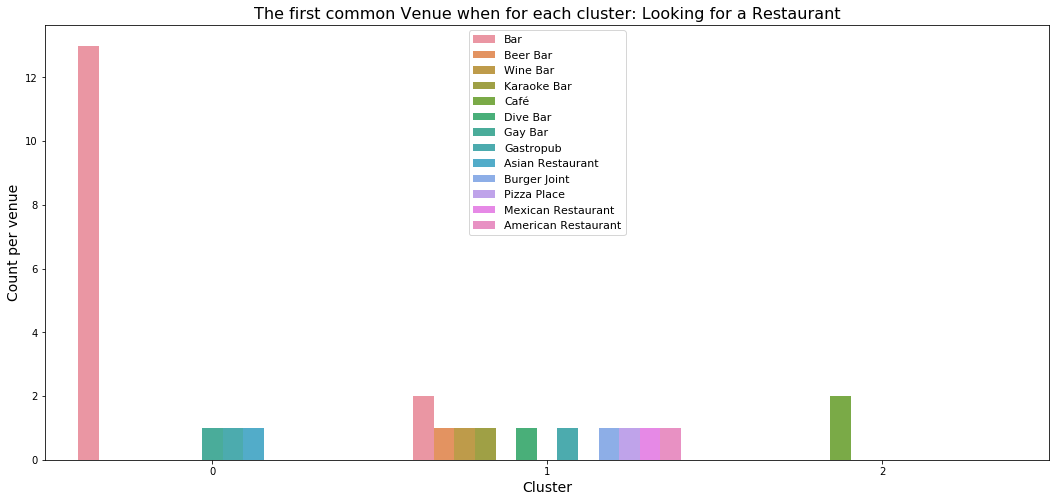

In [64]:
plt.figure(figsize=(18, 8))

sns.countplot("Cluster Labels",  hue="1st Most Common Venue", data = montreal_merged,)
plt.title("The first common Venue when for each cluster: Looking for a Restaurant", fontsize=16)
plt.xticks(np.arange(3), (0, 1, 2))
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Count per venue", fontsize=14)
plt.legend(fontsize=11)
plt.show()